# 线性回归

先看看我们高中期间就背了的线性回归方程：

$y=bx+a$

给一组数据$(x_1,y_1), (x_2,y_2), \dots ,(x_n,y_n)$，线性回归方程中的系数$a,b$满足：

$\begin{cases}b=\frac{n\sum_{i=1}^nx_iy_i-(\sum_{i=1}^nx_i)(\sum_{i=1}^ny_i)}{n\sum_{i=1}^nx_i^2-(\sum_{i=1}^nx_i)^2} \\a=\overline{y}-b\overline{x}\end{cases}$

上面作出来的直线，就是所有数据到平面上任意直线距离之和最短的一条直线。有了这条直线，我们就可以看出数据的趋势，并根据这条直线来预测$y$。

推广到n维：

给定n维输入：$\mathbf{x}=[x_{1},x_{2},\dots,x_{n}]^{T}$

线性模型有一个n维权重和一个标量偏差：$\mathbf{w}=[w_{1},w_{2},\dots,w_{n}]^{T},\quad b$

输出是输入的加权和：$y=w_1x_1+w_2x_2+\ldots+w_nx_n+b$

向量版本：$y=\langle\mathbf{w},\mathbf{x}\rangle+b$

注：$\langle\mathbf{w},\mathbf{x}\rangle$表示向量内积，它等于$\mathbf{w}^T\mathbf{x}$

比较真实值和预估值之间的差距，这里我们用平方损失。

**平方损失**：假设$y$是真实值，$\hat{y}$是估计值，则平方损失：$\ell(y,\hat{y})=\frac12\left(y-\hat{y}\right)^2$（**为什么要乘$\frac12$**：这个$\frac12$在梯度计算中不是必须的，有没有这$\frac12$对梯度的方向都没影响。这里留个$\frac{1}{2}$是为了求导后把系数消掉，这样计算梯度时结果那边不需要留着系数2。而且可以统一度量，当嵌套层数比较多的时候不至于在求导后的结果前有一大堆乱七八糟没有什么意义的系数）

**训练损失**：$$\ell(\mathbf{X},\mathbf{y},\mathbf{w},b)=\frac{1}{2n}\sum_{i=1}^{n}\left(y_{i}-\langle\mathbf{x}_{i},\mathbf{w}\rangle-b\right)^{2}=\frac{1}{2n}\left\Vert\mathbf{y}-\mathbf{X}\mathbf{w}-b\right\Vert^{2}$$(这个$\frac1n$的意思是我把$\mathbf{y}$的每个元素求平方损失的梯度加起来做个平均作为我最终的梯度)

最小化损失来学习参数：$$\mathbf{w}^*,\mathbf{b}^*=\arg\min_{\mathbf{w},b}\ell(\mathbf{X},\mathbf{y},\mathbf{w},b)$$

将偏差b加入权重：$\mathbf{X}\leftarrow[\mathbf{X},\mathbf{1}]\quad\mathbf{w}\leftarrow\begin{bmatrix}\mathbf{w}\\b\end{bmatrix}$（注意这里$\mathbf{X}$是矩阵，这是一个分块矩阵）

$\ell(\mathbf{X},\mathbf{y},\mathbf{w})=\frac1{2n}\parallel\mathbf{y}-\mathbf{X}\mathbf{w}\parallel^2$

则：$\frac{\partial}{\partial\mathbf{w}}\ell(\mathbf{X},\mathbf{y},\mathbf{w})=-\frac{1}{n}\left(\mathbf{y}-\mathbf{X}\mathbf{w}\right)^{T}\mathbf{X}$

<u>证明</u>：

已知$Y=||X||^2$，$\frac{\partial Y}{\partial X} = 2X^T$

则：$\frac{\partial \ell}{\partial \mathbf{w}}=\frac{\partial \ell}{\partial(\mathbf{y}-\mathbf{X}\mathbf{w})}\cdot\frac{\partial(\mathbf{y}-\mathbf{X}\mathbf{w})}{\partial\mathbf{w}}\cdot\frac{1}{2n}$

$\frac{\partial \ell}{\partial(\mathbf{y}-\mathbf{X}\mathbf{w})}=2 \cdot (\mathbf{y}-\mathbf{X}\mathbf{w})^T$

$\frac{\partial(\mathbf{y}-\mathbf{X}\mathbf{w})}{\partial\mathbf{w}}=-\frac{\partial(\mathbf{X}\mathbf{w})}{\partial\mathbf{w}}=-\mathbf{X}$(这里，把$\mathbf{X},w$展开来验算一下即可)

$原式=-\frac{1}{n}\left(\mathbf{y}-\mathbf{X}\mathbf{w}\right)^{T}\mathbf{X}$

<u>证毕</u>

损失是凸函数，最优解满足：

$\begin{aligned}\frac{\partial}{\partial\mathbf{w}}\ell(\mathbf{X},\mathbf{y},\mathbf{w})&=0\\\Leftrightarrow-\frac{1}{n}\left(\mathbf{y}-\mathbf{X}\mathbf{w}\right)^T\mathbf{X}&=0\\\end{aligned}$

$\Leftrightarrow\mathbf{w}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}\mathbf{y}$

## 正态分布与平方损失

若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。 噪声正态分布如下式: 

$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon$

其中， $\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）（在给定$\mathbf{x}$下能判断为$y$的概率） :

$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$

现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的*似然*最大的值（互相独立）： 

$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)})$

根据极大似然估计法（列出带变量的概率公式，找到让这个概率公式取值最大的变量的值）选择的估计量称为*极大似然估计量*。 由于优化一般是说最小化而不是最大化。 我们可以改为*最小化负对数似然* $-\log P(\mathbf y \mid \mathbf X)$。即：

$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$

对于一组确定的样本，$\sigma$是定值，因此$ \frac{1}{2} \log(2 \pi \sigma^2)$是个常数，$\frac{1}{2 \sigma^2} $这个常系数也影响不了变量$\mathbf{w}$和$b$的值。因此，最小化$-\log P(\mathbf y \mid \mathbf X)$，等价于最小化$\sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$，这个正好是平方损失。



线性回归可以看作是单层网络：

![1697721114051](assets/1697721114051.png)

## 优化方法

梯度下降：

挑选一个初值$w_0$（这个初值可以随机取，也可以是一个固定值，也可以通过某些手段求出大概的值，在线性回归中，由于损失函数是凸函数，因此这个值随便取肯定能收敛，但如果函数更复杂，有好几个极值，这个初值的选取就得谨慎了）

重复迭代参数$t$：$\mathbf{w}_t=\mathbf{w}_{t-1}-\eta\frac{\partial\ell}{\partial\mathbf{w}_{t-1}}$

$t时刻的w=t-1时刻的w-学习率*(t-1)时刻的梯度$

*沿梯度方向将增加损失函数值。

**学习率**（learning_rate，lr）是超参数（需要手动调的参数），太小收敛慢，太大会震荡。

小批量随机梯度下降：

在整个训练集上算梯度太贵，我们可以随机采样b个样本$i_1,i_2,...,i_b$来近似损失 

$\frac1b\sum_{i\in I_b}\ell(\mathbf{x}_i,y_i,\mathbf{w})$

b是超参数**批量大小**（batch_size），太小影响效率，太大计算消耗太大。



### 线性回归的从零开始实现

In [1]:
import random
import torch
from d2l import torch as d2l

生成数据集：

原理是假设观测中包含噪声，其中噪声服从正态分布，因此可以使用正态分布的随机数来模拟噪声。公式如下：
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$


In [7]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+e噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 生成X，num_examples行，len(w)列，服从正态分布，这个不是噪声
    print("X",X.shape)
    print("w",w.shape)
    y = torch.matmul(X, w) + b # 生成y，y=Xw+b
    print("y",y.shape)
    y += torch.normal(0, 0.01, y.shape) # 生成噪声
    return X, y.reshape((-1, 1)) # 返回X，y，reshape这里的-1被理解为unspecified value，意思是未指定为给定的。如果我只需要特定的列数，行数多少我无所谓，我只需要指定列数，那么行数直接用-1代替就行了，pytorch会自动计算行数。

true_w = torch.tensor([2, -3.4]) # 真实w，形状为（2，1），一个数组创建的张量默认为列向量（size=(2)，第一维是行数）
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

X torch.Size([1000, 2])
w torch.Size([2])
y torch.Size([1000])


In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.0013, 0.0587]) 
label: tensor([6.0079])


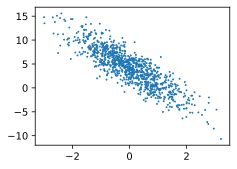

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

读取数据集：

定义一个函数， 该函数能打乱数据集中的样本并以小批量方式获取数据。

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成一个0到num_examples-1的列表
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) # 打乱标号
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) #min防止越界
        yield features[batch_indices], labels[batch_indices] # yield是一个关键词，类似return，但是不会终止函数，而是返回一个生成器，可以用for循环迭代，features和labels是张量，可以用含有索引号的张量取值

In [9]:
batch_size = 10 # 批量大小

for X, y in data_iter(batch_size, features, labels): # 这里的X和y是data_iter返回的生成器，每次迭代都会返回一个batch_size大小的X和y
    print(X, '\n', y)
    break # 只打印第一个batch

tensor([[ 0.0168,  1.0488],
        [ 2.1374,  0.9294],
        [-1.0730, -0.1635],
        [ 0.8748, -0.7188],
        [-1.3259, -0.9804],
        [-0.2342, -1.4083],
        [ 0.2874, -1.7580],
        [-1.5136, -0.4455],
        [-2.2491,  0.5857],
        [-0.1041, -1.7693]]) 
 tensor([[ 0.6622],
        [ 5.3234],
        [ 2.6003],
        [ 8.3968],
        [ 4.8956],
        [ 8.5193],
        [10.7588],
        [ 2.6879],
        [-2.2929],
        [10.0244]])


初始化模型参数

In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) # 用正态分布随机生成一个w，requires_grad=True表示需要计算梯度
b = torch.zeros(1, requires_grad=True) # b默认取0，同样需要计算梯度

In [11]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [12]:
def squared_loss(y_hat, y):  # 损失函数
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size):  # 优化算法
    """
    梯度下降
    params:参数，也就是要计算梯度的变量，这里是w和b
    lr:学习率
    batch_size:批量大小
    """
    with torch.no_grad():
        for param in params: # 遍历需要计算梯度的变量列表
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lr = 0.03 # 学习率
num_epochs = 3 # 迭代次数
net = linreg # 线性回归模型
loss = squared_loss # 损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels): # 这里通过data_iter实现小批量，下面的sgd计算梯度，这一整个for循环才叫做小批量梯度下降
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数，注意这里的传参[w,b]是引用，所以sgd里对w和b的修改会影响到这里的w和b
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) # 计算所有样本的损失
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}') # 计算平均损失

epoch 1, loss 0.033685
epoch 2, loss 0.000117
epoch 3, loss 0.000049


In [15]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0005, -0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
